In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [87]:
data=pd.read_csv('creditcard.csv')

In [88]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [135]:
time=data['Time']/60


In [89]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [90]:
legit=data[data['Class']==0]
fraud=data[data['Class']==1]

### 0- Legit Transaction
### 1-Fraud Transaction
     

#### As the fraud and legit transactions are having a large difference in order improve efficiency we consider a sample from legit transactions

In [91]:
legit=legit.sample(492)

### concatenating legit and fraud data sets into one set

In [92]:
data=pd.concat([legit,fraud],axis=0)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
174000,121725.0,1.139107,-3.077281,-3.039725,-1.077517,-1.125187,-1.446970,0.726425,-0.676454,-2.216854,...,0.538141,0.572093,-0.685423,0.128440,0.328634,0.214339,-0.202199,0.009094,642.80,0
198034,132294.0,0.087567,0.723798,-0.315212,-1.059967,1.184956,0.217843,0.775204,0.148431,-0.126986,...,-0.294573,-0.776946,-0.032053,-0.379407,-0.382702,0.156040,0.232124,0.081684,2.69,0
73371,55105.0,-3.861675,2.407060,-0.983850,-0.790425,-0.156880,4.358016,-2.624498,3.417116,1.102450,...,-0.112890,-0.509753,0.010666,1.042407,0.803095,0.433399,-0.423778,0.073211,6.26,0
77328,57000.0,-0.374376,1.766374,-0.623695,0.529115,1.708753,-1.631841,1.893354,-0.868290,0.216714,...,-0.139744,0.119664,-0.123933,0.015197,-0.871873,-0.733713,-0.400182,-0.284680,1.61,0
240533,150644.0,-0.608337,0.961335,-0.115365,-0.500028,0.234970,-1.247456,0.650731,0.153730,-0.205084,...,-0.211866,-0.520280,0.334773,0.047437,-0.408553,0.134730,0.022348,0.008302,8.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


###  Null Values disturbs the model so check whether null values are there

<AxesSubplot:>

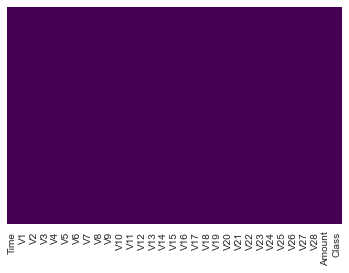

In [93]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### There are no null values

### SPLITTING INTO TRAIN AND TEST SPLIT

In [94]:
X=data.drop('Class',axis=1)
y=data['Class']

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### The data should be classified

### LOGISTIC REGRESSION

In [96]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
p=lr.predict(X_test)

### ACCURACY SCORE


In [97]:
from sklearn.metrics import accuracy_score

In [98]:
log=accuracy_score(p,y_test)

### Decision Tree Classifier

In [99]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
r=dtree.predict(X_test)

In [100]:
dt=accuracy_score(r,y_test)

### Random Forest Classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
e=rfc.predict(X_test)

In [102]:
ran=accuracy_score(e,y_test)

#### Support Vector Machines Algorithm

In [103]:
from sklearn.svm import SVC
s=SVC()
s.fit(X_train,y_train)
d=s.predict(X_test)

In [104]:
sup=accuracy_score(d,y_test)

In [105]:
params_grid={'C':[1,0.1,0.01,0.001], 'gamma':[0.1,1,10,100,1000]}
from sklearn.model_selection import GridSearchCV
g=GridSearchCV(SVC(),params_grid,verbose=3)
g.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .................................C=1, gamma=0.1; total time=   0.0s
[CV 2/5] END .................................C=1, gamma=0.1; total time=   0.0s
[CV 3/5] END .................................C=1, gamma=0.1; total time=   0.0s
[CV 4/5] END .................................C=1, gamma=0.1; total time=   0.1s
[CV 5/5] END .................................C=1, gamma=0.1; total time=   0.0s
[CV 1/5] END ...................................C=1, gamma=1; total time=   0.0s
[CV 2/5] END ...................................C=1, gamma=1; total time=   0.0s
[CV 3/5] END ...................................C=1, gamma=1; total time=   0.0s
[CV 4/5] END ...................................C=1, gamma=1; total time=   0.0s
[CV 5/5] END ...................................C=1, gamma=1; total time=   0.0s
[CV 1/5] END ..................................C=1, gamma=10; total time=   0.0s
[CV 2/5] END ..................................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 0.1, 0.01, 0.001],
                         'gamma': [0.1, 1, 10, 100, 1000]},
             verbose=3)

In [106]:
g.best_params_

{'C': 1, 'gamma': 0.1}

In [107]:
i=g.predict(X_test)

In [108]:
gcv=accuracy_score(i,y_test)

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
kp=knn.predict(X_test)

In [110]:
nei=accuracy_score(kp,y_test)

In [111]:
error_rate=[]
for i in range(1,40):
    kn=KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train,y_train)
    kpe=kn.predict(X_test)
    error_rate.append(np.mean(kpe!=y_test))

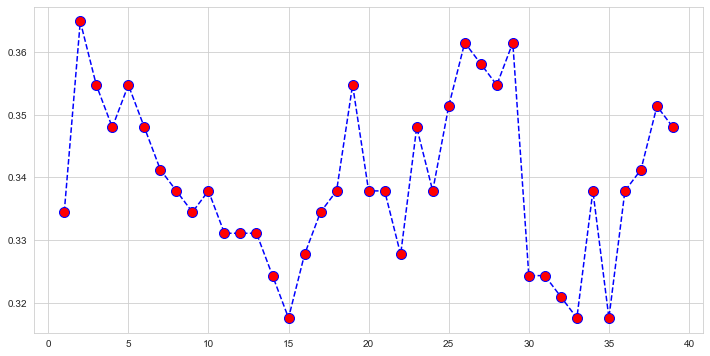

In [112]:
plt.figure(figsize=[12,6])
sns.set_style('whitegrid')
plt.plot(range(1,40),error_rate,'b--',marker='o',markerfacecolor='red',markersize=10)

### TABLE OF ACCURACIES FOR VARIOUS ALOGRITHMS

In [128]:
acc=[log,dt,ran,sup,gcv,nei]
ind=['LOG REG','Dec.Tree','Rand. Forest','SVC','GRID','KNN']

In [129]:
ac_score=pd.DataFrame(acc,columns=['Accuracy_Score'],index=ind)

In [130]:
ac_score

,Accuracy_Score
LOG REG,0.922297
Dec.Tree,0.898649
Rand. Forest,0.932432
SVC,0.516892
GRID,0.520270
KNN,0.645270


In [131]:
ac_score[ac_score['Accuracy_Score']==ac_score['Accuracy_Score'].max()]

,Accuracy_Score
Rand. Forest,0.932432


### So it is preferrable to use random forest classifier